### Descubrir estructuras ocultas co n ML si supervisioón
- Explorando estructuras de nuestros datos para extraer informacion signiifcativa sin la ayuda de una variable de resualtdosconcoida 

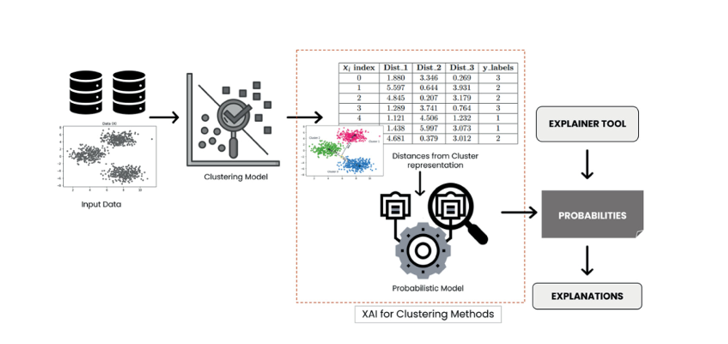

Fuente: Explainability for Clustering Models. Mahima Arora(B) and Ankush Chopra

In [1]:
!pip install shap

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
%matplotlib inline 

from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


#import shap
# load JS visualization code to notebook
#shap.initjs()

import warnings
warnings.filterwarnings('ignore')

In [3]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

### Ojo...insertar informacion de la data. Hay un word que explica esto....
https://towardsdatascience.com/how-to-make-clustering-explainable-1582390476cc

In [4]:
wine_df = pd.read_csv('wine-clustering.csv')
wine_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


2314

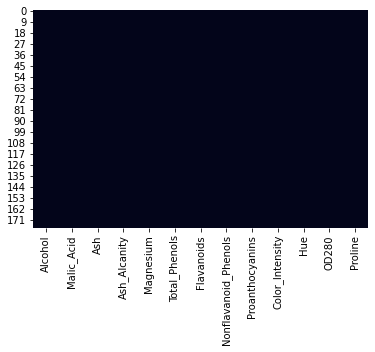

In [5]:
import seaborn as sns
sns.heatmap(wine_df.isnull(), cbar=False)
wine_df.size

<h2 id="pattern_visualization">2. Análisis de patrones de características individuales mediante visualización</h2>
- Para instalar seaborn usamos  pip que es el administrador de paquetes de python.

### calcular la correlación entre variables de tipo “int64” o “float64” utilizando el método “corr”:

In [6]:
wine_df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


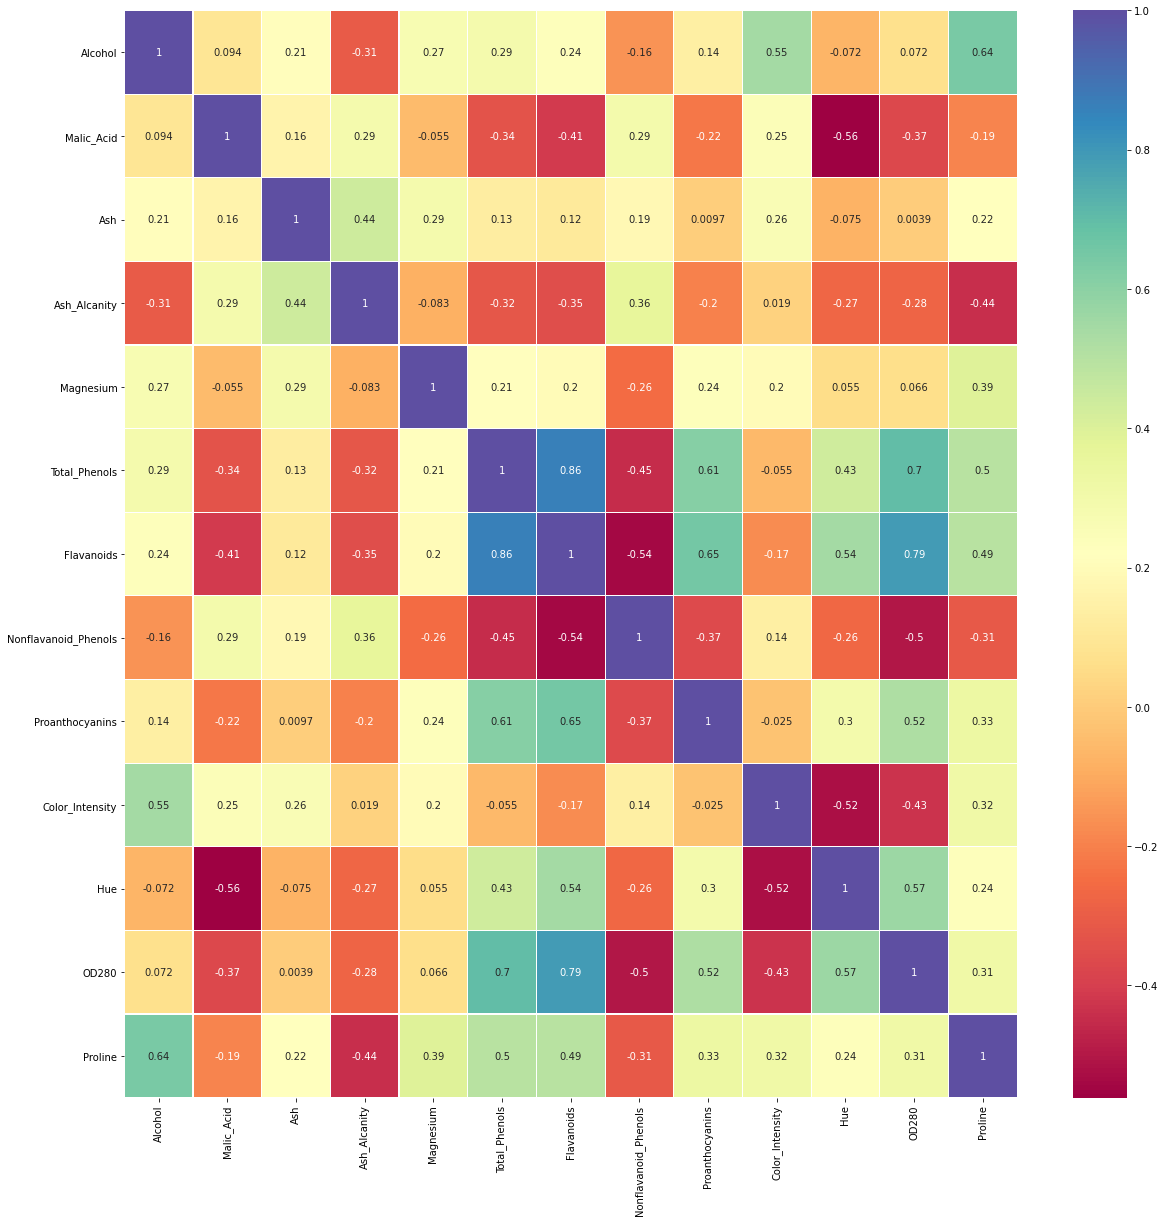

In [7]:
# Creating a correlation heatmap
sns.heatmap(wine_df.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

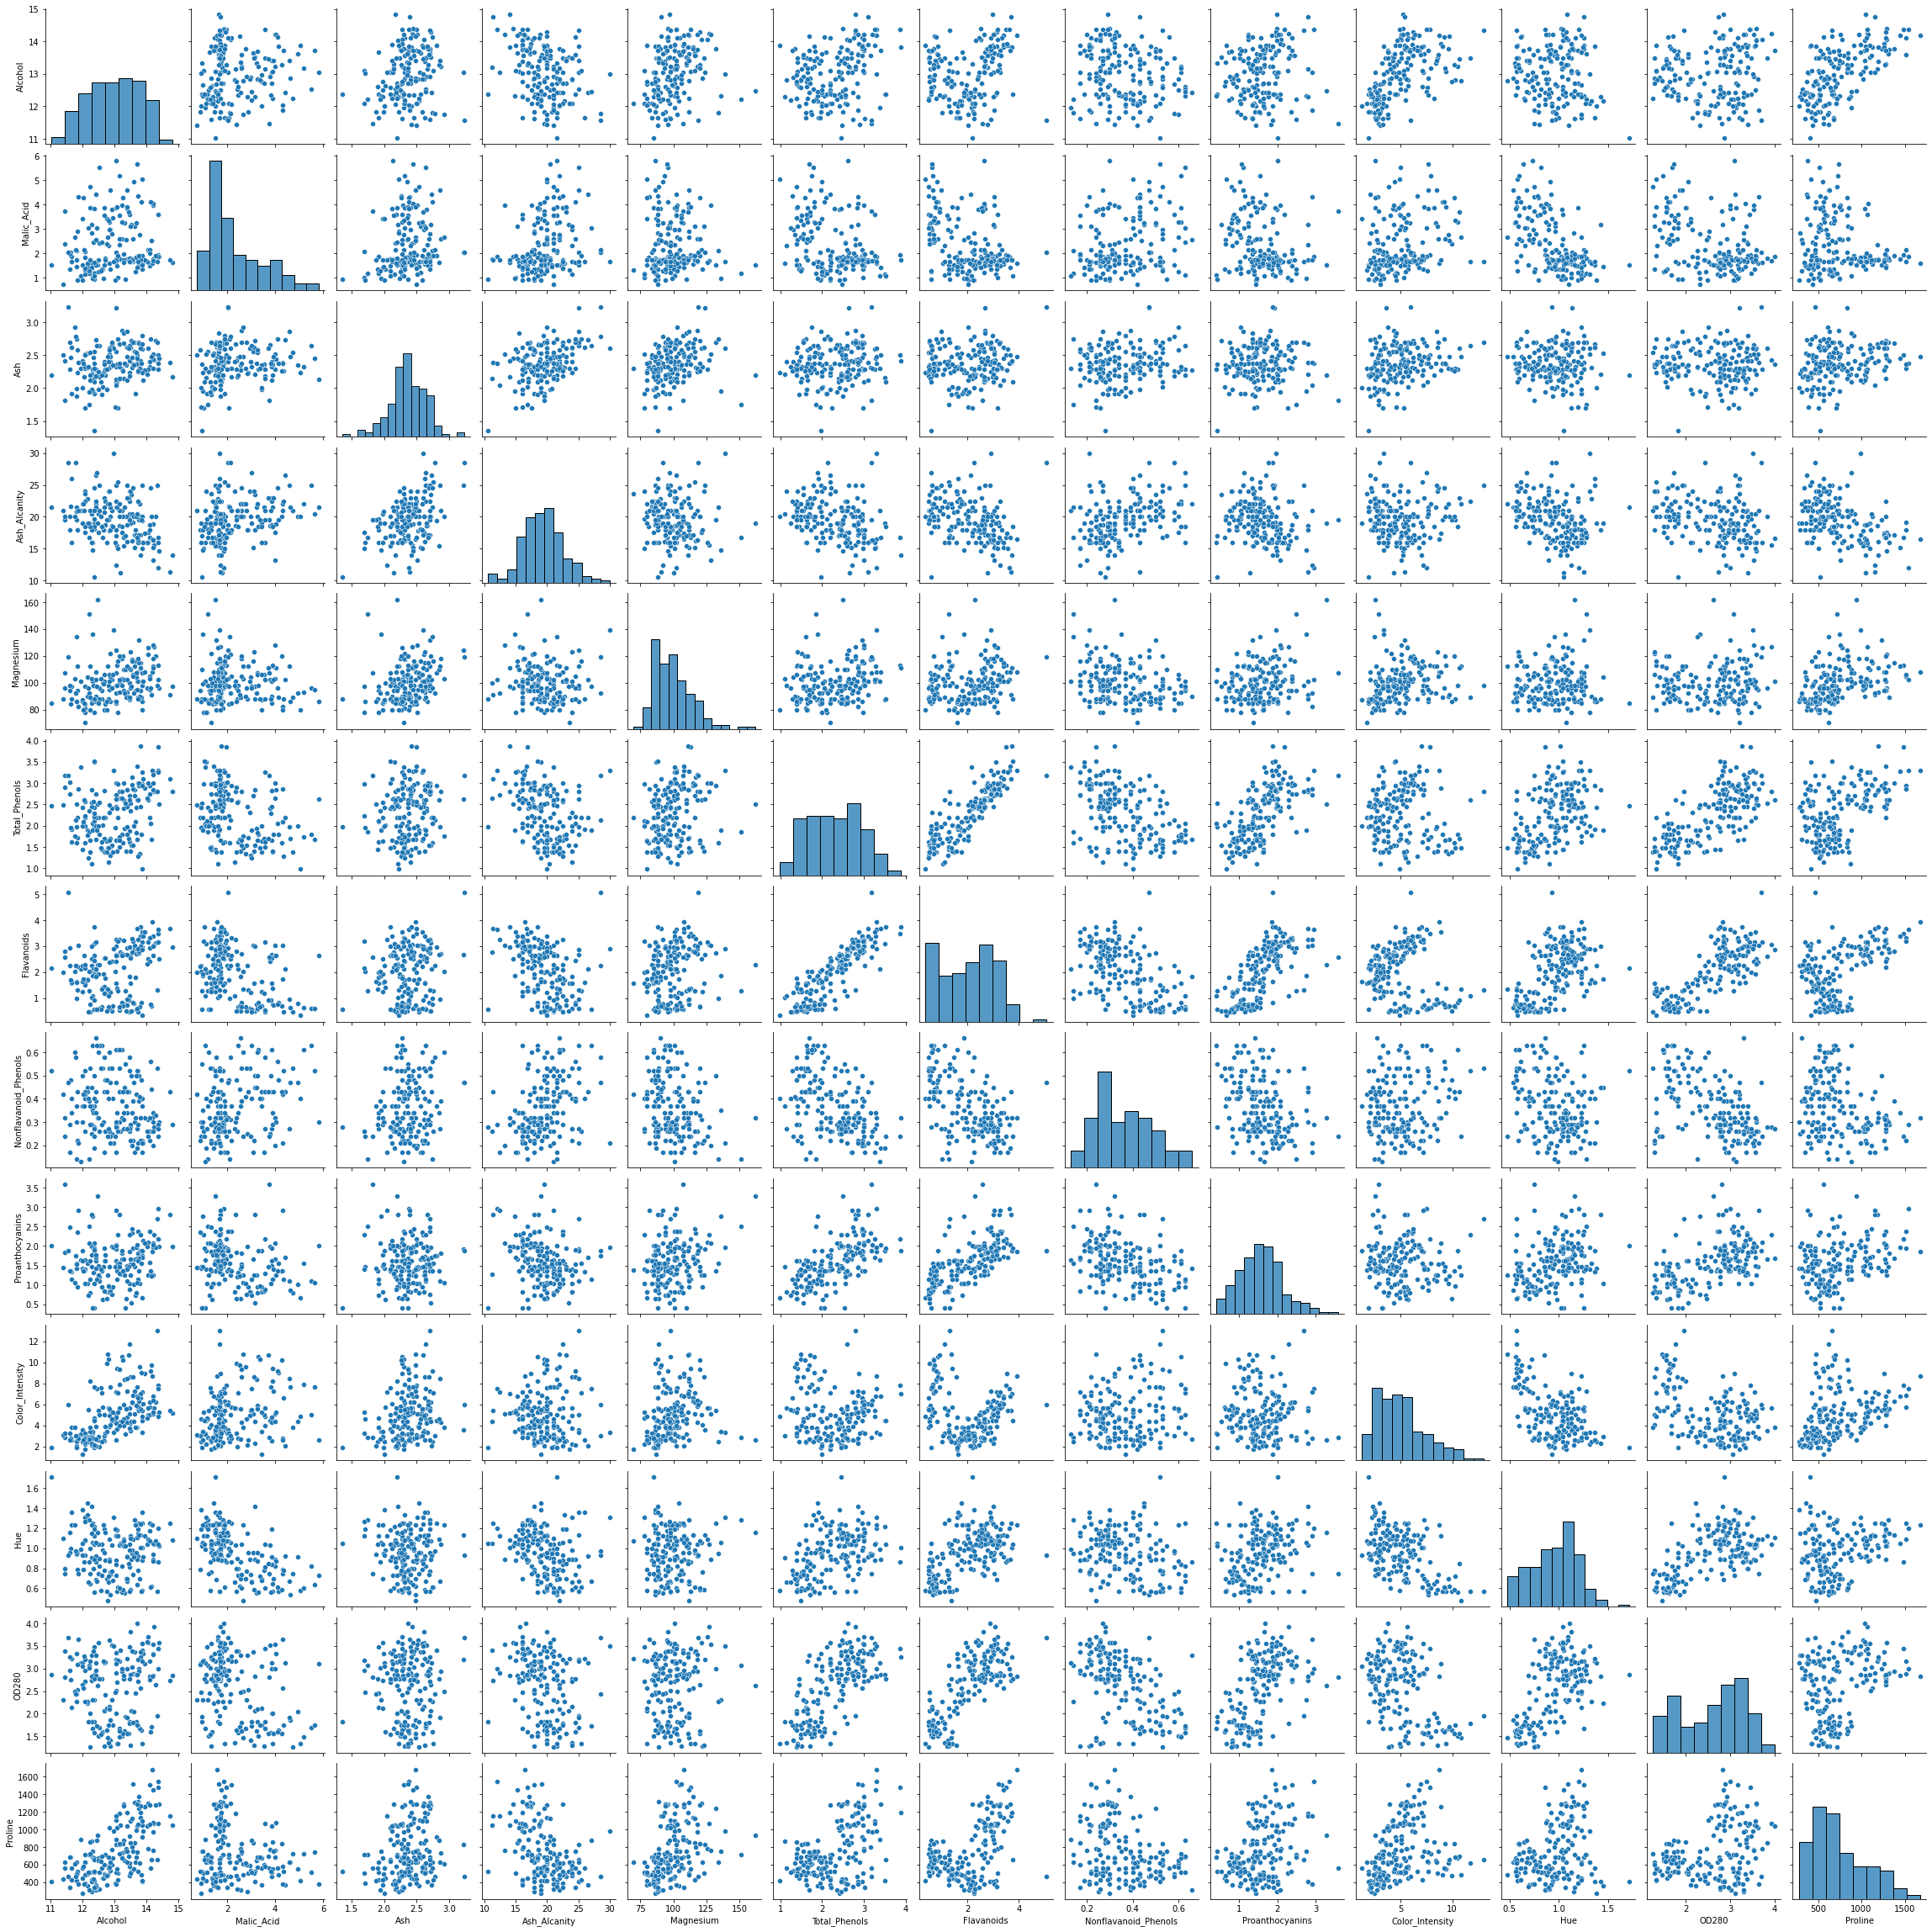

In [8]:
# Visualizar la relación entre todas las variables utilizando una matriz de diagramas de dispersión
sns.pairplot(wine_df)

### Reduccion de caracteriticas con PCA y Preprocesamiento

### Normalizar las características. Utilicé MinMaxScaler.

In [9]:
from sklearn import preprocessing
wine_value = wine_df.copy().values
min_max_scaler = preprocessing.MinMaxScaler()
wine_scaled = min_max_scaler.fit_transform(wine_value)
wine_df_scaled = pd.DataFrame(wine_scaled, columns=wine_df.columns)
wine_df_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [10]:
wine_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    float64
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


### Numero Optimo de Clusters K-Means

#Algoritmo K-mean. Podemos ejecutar fácilmente K-Means para una variedad de clústeres y recopilar las distorsiones en una lista

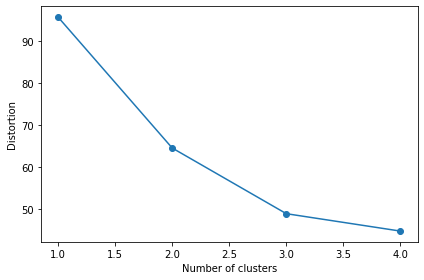

In [11]:
#1. Forma de Elbow Method for K means funete: Sebastian Raschka
distortions = []
for i in range(1, 5):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(wine_df_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 5), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

- Se observa la distorsion de 50 y en tres cluster es claro el codo, no hay varición

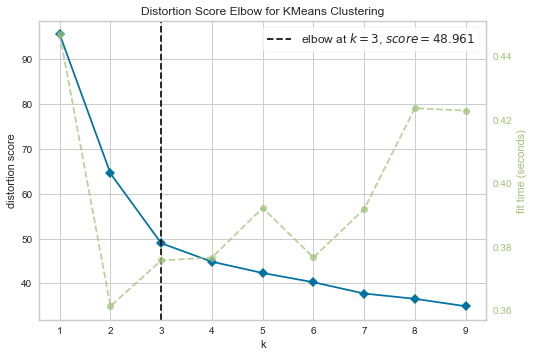

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# 2. Forma de Elbow Method for K means- Fuente: Indraneel Dutta Baruah
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(wine_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Cuantificacion de la calidad del agrupmaineto mediante Grafico de silueta
- Representa una medida de como estan agrupadas las muestras en los grupos.
- Definición de la Silhouette: La fórmula para calcular el coeficiente de Silhouette (Silhouette Coefficient) se define de la siguiente manera
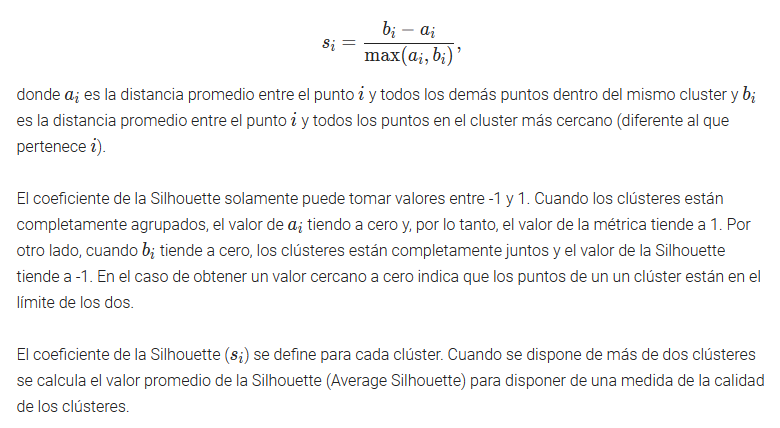

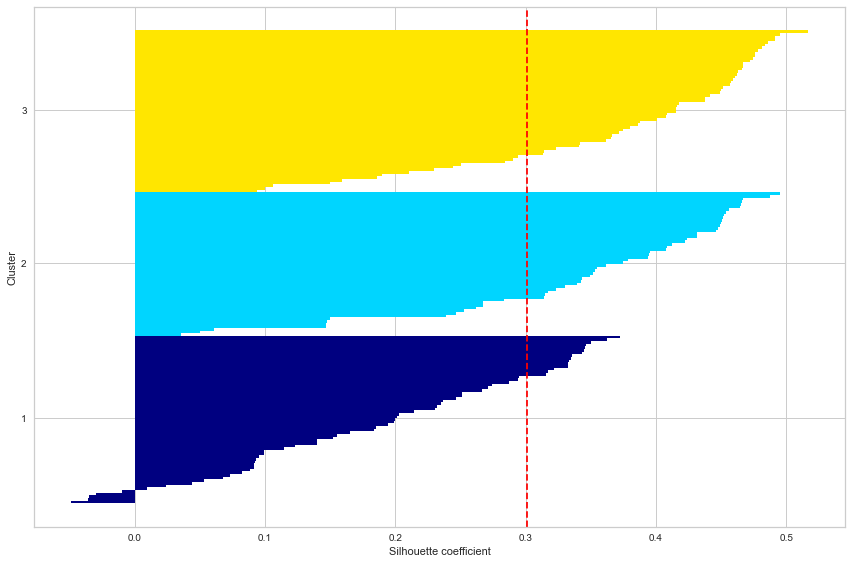

In [37]:
'''# 1. Forma de Graficos de silueta. Fuente: Sebastin Rasckka capt.11'''    
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=i, 
            init='k-means++', 
            n_init=100, 
            max_iter=300,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(wine_df_scaled)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(wine_df_scaled, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

- Mediante la inspeccion visual del grafico de silueta, podemos examinar los tamaños de los grupose identificar aquellos que comntinen outliers. Los coeficintes no se acrecan a 0 , indicador de un buen agrupamiento, hay un coefic. de silueta medio al grafico(linea roja punteada).

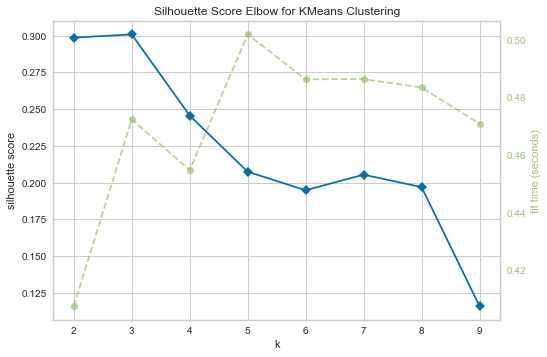

Optimal number of clusters based on silhouette score: [3]


In [14]:
# 2. Forma ed Silhouette Score for K means. Fuente: Indraneel Dutta Baruah

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(wine_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

Optimal number of clusters based on gap statistic: [26.0]


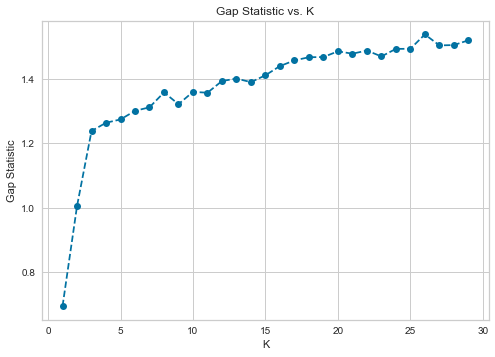

In [15]:
# Gap Statistic for K means. Fuente: Indraneel Dutta Baruah
# Tecnica demoradita ###


def optimalK(data, nrefs=3, maxClusters=10):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k, random_state =10)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(wine_df_scaled, nrefs=5, maxClusters=30)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

df2 = df[df.gap == df.gap.max()]
print('Optimal number of clusters based on gap statistic:', df2['clusterCount'].tolist())

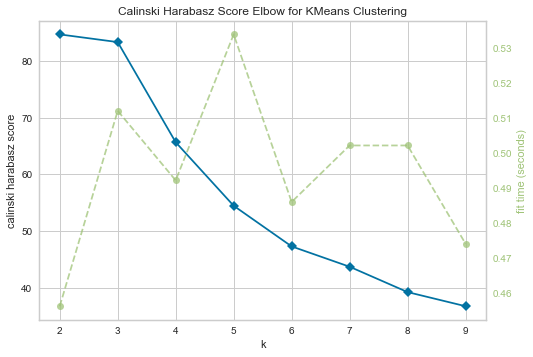

Optimal number of clusters based on calinski harabasz: [2]


In [16]:
# Calinski Harabasz Score for K means. Fuente: Indraneel Dutta Baruah

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(wine_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [3]


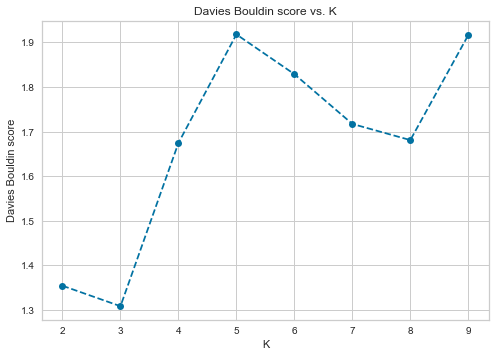

In [17]:
# Davies Bouldin score for K means. Fuente: Indraneel Dutta Baruah

from sklearn.metrics import davies_bouldin_score 

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center,random_state =10)

    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(wine_df_scaled)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(wine_df_scaled, model)
    
    return score

scores = []
centers = list(range(2,10))

for center in centers:
    scores.append(get_kmeans_score(wine_df_scaled, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

- Continuar proxima clase 14_Oct2023

### Para Etiquetar la data-Se necesita saber el # de Cluster y Usamos Kmeans 
- Podria existir otra forma de hacerlo que seria aplica directaente PCA antes de hallar el No de clusters

In [18]:
from sklearn.cluster import KMeans
# Realiza el clustering con K-Means
kmeans = KMeans(n_clusters=3)  # Número de clusters obtenidos tecnicas de clusters
labels = kmeans.fit_predict(wine_df_scaled)

In [19]:
# Agregación de las etiquetas numéricas al DataFrame
wine_df['cluster_label'] = labels

In [20]:
from sklearn.ensemble import RandomForestClassifier

X_wine = wine_df_scaled  # Tus características
y_wine = wine_df['cluster_label']  # La etiqueta numérica que hemos asignado

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(wine_df_scaled, y_wine)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

### Usamos el Random Forest para la Selección de características

In [21]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_wine), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [22]:
feature_importances_sorted

Flavanoids              0.200044
Proline                 0.190763
Alcohol                 0.135574
OD280                   0.131220
Color_Intensity         0.109456
Hue                     0.053107
Total_Phenols           0.051437
Magnesium               0.041208
Proanthocyanins         0.021664
Nonflavanoid_Phenols    0.017833
Malic_Acid              0.015992
Ash                     0.015930
Ash_Alcanity            0.015772
dtype: float64

In [23]:
0.201140+0.186457+0.133654+0.133080+0.106035+0.057167+0.055678+0.042604+0.018439+0.018211+0.018179+0.017347+0.012010          

1.000001

<AxesSubplot:>

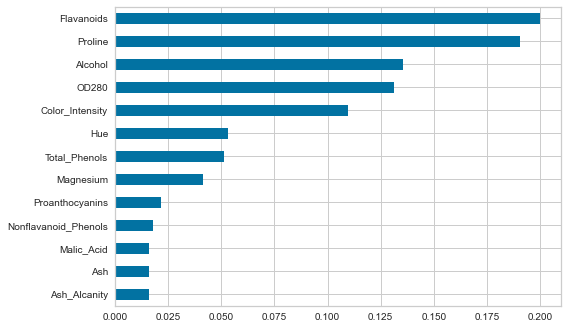

In [24]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_wine.columns, 'y_axis':feature_importances_sorted}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh()

In [47]:
'''Reducimos el conjunto de datos a las 8 características las más importantes mirando la imagen anterior
pero vemos adelante que a mayor # de caract. más componenestes y mayor explicabilidad '''
X_reduced = X_wine[list(feature_importances_sorted.head(8).index)].copy()
X_reduced

,Flavanoids,Proline,Alcohol,OD280,Color_Intensity,Hue,Total_Phenols,Magnesium
0,0.573840,0.561341,0.842105,0.970696,0.372014,0.455285,0.627586,0.619565
1,0.510549,0.550642,0.571053,0.780220,0.264505,0.463415,0.575862,0.326087
2,0.611814,0.646933,0.560526,0.695971,0.375427,0.447154,0.627586,0.336957
3,0.664557,0.857347,0.878947,0.798535,0.556314,0.308943,0.989655,0.467391
4,0.495781,0.325963,0.581579,0.608059,0.259386,0.455285,0.627586,0.521739
...,...,...,...,...,...,...,...,...
173,0.056962,0.329529,0.705263,0.172161,0.547782,0.130081,0.241379,0.271739
174,0.086498,0.336662,0.623684,0.106227,0.513652,0.178862,0.282759,0.347826
175,0.073840,0.397290,0.589474,0.106227,0.761092,0.089431,0.210345,0.543478
176,0.071730,0.400856,0.563158,0.128205,0.684300,0.097561,0.231034,0.543478


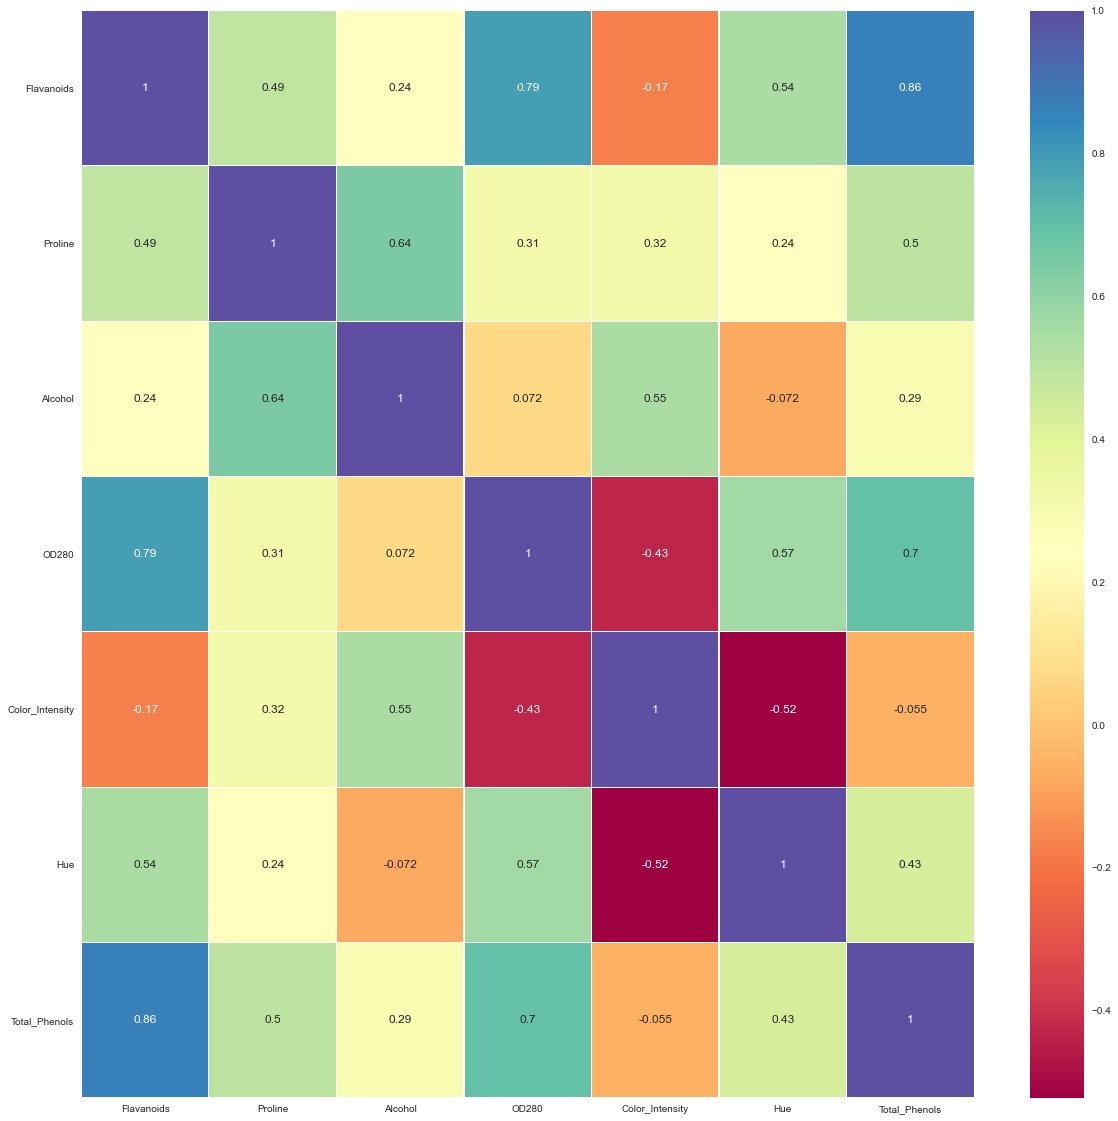

In [26]:
# Volvemos a mirar la correlación de variables mediante heatmap
sns.heatmap(X_reduced.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [27]:
#No esta desbalacedao no necesita balanceo
y_wine.value_counts()

0    63
2    61
1    54
Name: cluster_label, dtype: int64

In [28]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Flavanoids       178 non-null    float64
 1   Proline          178 non-null    float64
 2   Alcohol          178 non-null    float64
 3   OD280            178 non-null    float64
 4   Color_Intensity  178 non-null    float64
 5   Hue              178 non-null    float64
 6   Total_Phenols    178 non-null    float64
dtypes: float64(7)
memory usage: 9.9 KB


In [29]:
# In[4]:
print('#### Mezclar la base de datos###############')
#Mezclar la base de datos
X_reduced = X_reduced.sample(frac=1).reset_index(drop=True)
X_reduced.head(10)

#### Mezclar la base de datos###############


,Flavanoids,Proline,Alcohol,OD280,Color_Intensity,Hue,Total_Phenols
0,0.316456,0.026391,0.365789,0.743590,0.121160,0.308943,0.241379
1,0.567511,0.072753,0.221053,0.868132,0.129693,0.219512,0.648276
2,0.531646,0.094151,0.744737,0.692308,0.179181,0.715447,0.679310
3,0.086498,0.336662,0.623684,0.106227,0.513652,0.178862,0.282759
4,0.221519,0.194009,0.539474,0.021978,0.692833,0.073171,0.148276
5,0.466245,0.131954,0.439474,0.681319,0.110068,0.577236,0.637931
6,0.033755,0.229672,0.500000,0.380952,0.283276,0.235772,0.193103
7,0.137131,0.247504,0.205263,0.362637,0.104096,0.382114,0.213793
8,0.067511,0.297432,0.413158,0.113553,0.496587,0.203252,0.220690
9,0.274262,0.203994,0.255263,0.652015,0.000000,0.365854,0.351724


(0.0, 1.261209644179639)

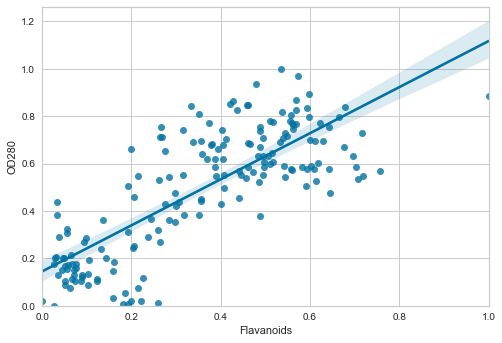

In [30]:
sns.regplot(x="Flavanoids", y="OD280", data=X_reduced)
plt.ylim(0,)

(0.0, 1.1258939843707205)

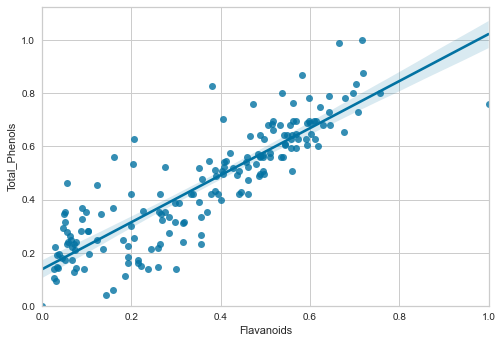

In [31]:
sns.regplot(x="Flavanoids", y="Total_Phenols", data=X_reduced)
plt.ylim(0,)

(0.0, 1.0499999999999998)

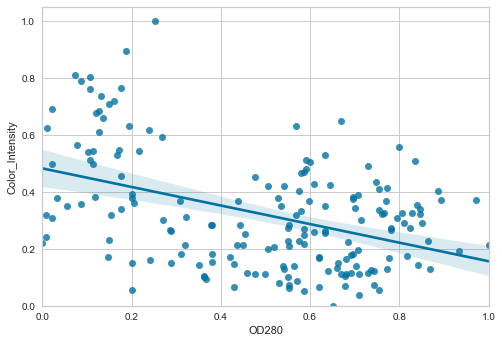

In [32]:
sns.regplot(x="OD280", y="Color_Intensity", data=X_reduced)
plt.ylim(0,)

### > OD280 es menor intensidad color

(0.0, 1.0551052359959994)

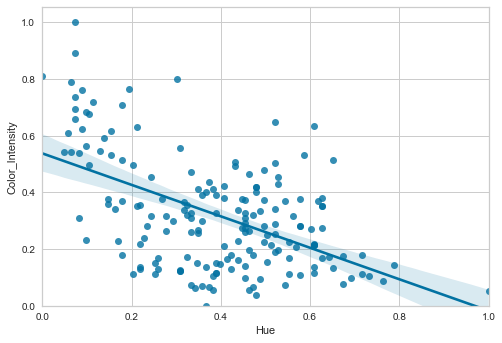

In [33]:
sns.regplot(x="Hue", y="Color_Intensity", data=X_reduced)
plt.ylim(0,)

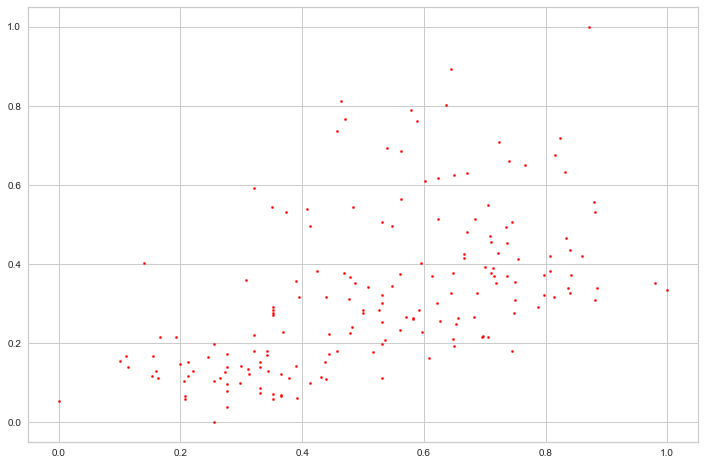

In [38]:
'''Inicialización de los cluster centroides donde (K=4)'''
K=3

#Representación grafica de los datos
plt.rcParams['figure.figsize'] = (12,8)

feature1 = X_reduced['Alcohol'].values
feature2 = X_reduced['Color_Intensity'].values

plt.scatter(feature1, feature2, c='red', s=5)
plt.show()

In [40]:
# Obtener los centroides
centroids = kmeans.cluster_centers_

In [41]:
# Grafica los datos y los centroides
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

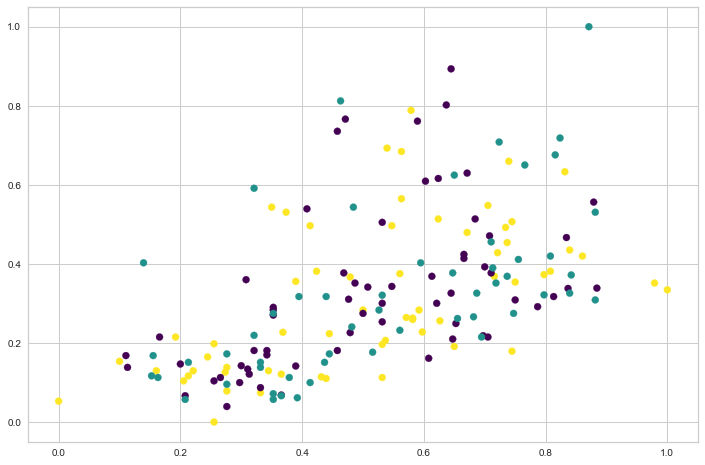

In [43]:
# Grafica los puntos de datos en función de las características
plt.scatter(X_reduced['Alcohol'], X_reduced['Color_Intensity'], c=labels, cmap='viridis')

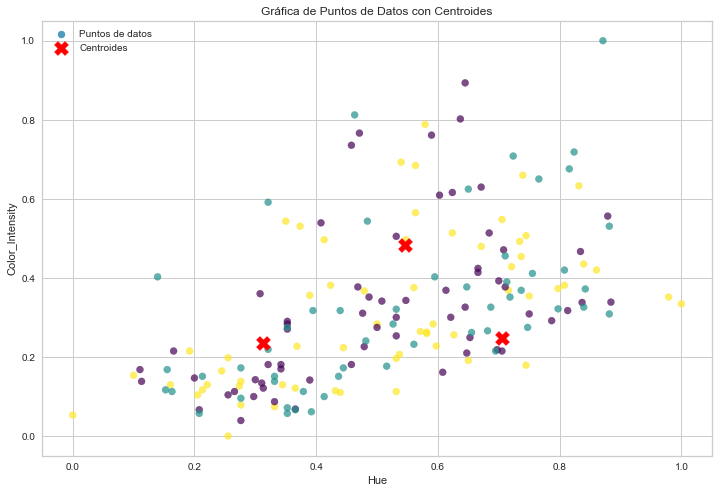

In [45]:
# Crear la gráfica de dispersión de puntos de datos
colors = ['red']
plt.scatter(X_reduced['Alcohol'], X_reduced['Color_Intensity'], c=labels, cmap='viridis', label='Puntos de datos', alpha=0.7)

# Agregar los centroides con marcadores y colores específicos
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c=colors, label='Centroides')

# Agregar leyenda
plt.legend()

# Etiquetas y título
plt.xlabel('Hue')
plt.ylabel('Color_Intensity')
plt.title('Gráfica de Puntos de Datos con Centroides')

# Mostrar la gráfica
plt.show()

## PCA con data escalada

In [48]:
# Función de bucle para identificar el número de componentes principales que explican al menos el 85% de la varianza 

from sklearn.decomposition import PCA

for comp in range(2, X_reduced.shape[1]):
    modelo_pca = PCA(n_components= comp)
    modelo_pca.fit(X_reduced)
    comp_check = modelo_pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp)
Final_PCA.fit(X_reduced)
cluster_df=Final_PCA.transform(X_reduced)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))
#con 3 comp explicacion de la variabilidad del 87% con mormalizado

Using 4 components, we can explain 0.881748372510579% of the variability in the original data.


In [49]:
#Se convierte el array a dataframe para añadir nombrs a los ejes(x=Componentes, Y=caracteriticas)
pd.DataFrame(modelo_pca.components_,columns=X_reduced.columns,index = [f'PC-{i+1}' for i in range(final_comp)]).T

,PC-1,PC-2,PC-3,PC-4
Flavanoids,-0.477238,0.033850,-0.202294,0.153775
Proline,-0.343809,-0.450901,0.438820,-0.108687
Alcohol,-0.177882,-0.561620,-0.003099,-0.477066
OD280,-0.552886,0.275718,-0.219964,-0.153491
Color_Intensity,0.097367,-0.553680,-0.325216,0.141157
Hue,-0.284538,0.245051,0.579763,-0.187174
Total_Phenols,-0.465704,-0.040714,-0.356847,0.271883
Magnesium,-0.096909,-0.189305,0.385863,0.764532


In [50]:
#Vector con el porcentaje de influencia de la varianza explicada por cada componente, 
# de las 12 variables resultantes del conjunto de datos
explained_variance = modelo_pca.explained_variance_ratio_
explained_variance 

array([0.47957507, 0.27186432, 0.07187379, 0.05843518])

In [52]:
00.47957507+0.27186432+0.07187379+0.05843518

0.8817483600000001

###  Los componentes corresponden a combinaciones de las características originales, los propios componentes se almacenan como un atributo del objeto PCA ajustado:

In [53]:
Final_PCA.components_

array([[-0.47723834, -0.34380921, -0.17788176, -0.55288604,  0.09736678,
        -0.28453805, -0.46570416, -0.09690899],
       [ 0.03385044, -0.45090086, -0.56161993,  0.27571826, -0.55367971,
         0.24505064, -0.04071377, -0.1893051 ],
       [-0.20229397,  0.43882011, -0.00309914, -0.21996357, -0.32521608,
         0.57976269, -0.35684729,  0.38586296],
       [ 0.15377454, -0.10868684, -0.47706631, -0.15349082,  0.14115687,
        -0.18717432,  0.2718828 ,  0.76453196]])

- En esta matriz numpy, cada fila representa un componente principal, y cada columna se relaciona con las características originales. podemos visualizar esta relación con un mapa de calor:

### INFLUENCIA DE LAS VARIABLES POR COMPONENTES

In [54]:
df_comp = pd.DataFrame(modelo_pca.components_, columns=X_reduced.columns,index = [f'PC-{i+1}' for i in range(final_comp)])

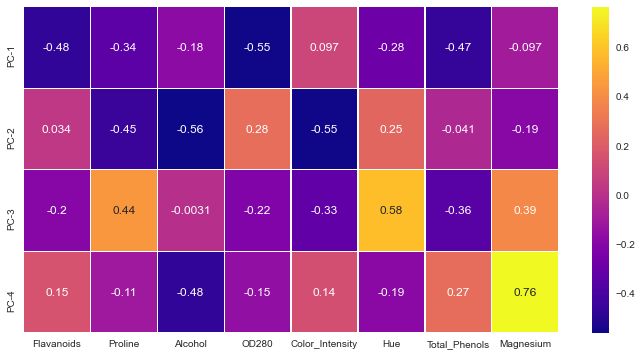

In [55]:
sns.heatmap(df_comp,annot=True, cmap='plasma', linewidths=0.1);
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

 Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos **explained_variance_ y explained_variance_ratio_** del modelo.

----------------------------------------------------
Percentage of variance explanation by each component
----------------------------------------------------
[0.47957507 0.27186432 0.07187379 0.05843518]


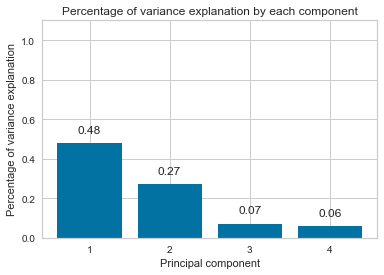

In [56]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Percentage of variance explanation by each component')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_reduced.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explanation by each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of variance explanation');

**En este caso, la primera componente uno explica el 48% de la varianza observada en los datos y la segunda el 27%. Sumando (0.48+0.27+0,07+0.06= 88%). Entonces con las primeras dos componentes, se consigue explicar unn 75% de la varianza observada, a partir de la segunda no superan por separado el 1% de varianza explicada**

In [57]:
#Visualizacion
cluster_df.shape
cluster_df = pd.DataFrame(cluster_df,index=X_reduced.index)
cluster_df

,0,1,2,3
0,-0.628351,-0.218730,0.024122,0.049181
1,-0.401193,0.002843,0.019860,-0.055976
2,-0.443889,-0.124027,0.000430,0.008157
3,-0.779068,-0.541126,-0.159284,0.075313
4,-0.264819,0.011970,0.016080,0.152020
...,...,...,...,...
173,0.487074,-0.370461,-0.039067,-0.102503
174,0.477645,-0.330277,0.026817,0.005776
175,0.533229,-0.531837,0.025104,0.195122
176,0.506114,-0.469009,0.044647,0.196854


Los 3 componentes principales resultantes son los 3valores propios de los vectores propios con el valor más alto de los 12 originales del conjunto de datos. De ahí se obtuvieron los seis más altos para obtener las 6 dimensiones resultantes o componentes principales

### Entrenamiento de KMEANS con el conjunto de datos reducido

In [58]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_2.fit_predict(cluster_df)

In [61]:
y_wine.value_counts()

0    63
2    61
1    54
Name: cluster_label, dtype: int64

In [63]:
# Evaluamos los clusters y el contenido que se han formado
counter = Counter(clusters.tolist())
bad_counter = Counter(clusters[y_wine == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

Label 0 has 67 samples - 2 are malicious samples
Label 1 has 52 samples - 52 are malicious samples
Label 2 has 59 samples - 0 are malicious samples


## 7. Evaluación de los resultados- Revisar la Teoria de las Metricas de Evaluación

Hay que tener cuidado con los conjuntos de datos desequilibrados cuando se utilizan métricas para medir la pureza de los clusters. Una posible solución es utilizar técnicas de equilibrado del conjunto de datos, como la generación de más ejemplos de transacciones fraudulentas o la disminución de ejemplos de transacciones legítimas.

#### 7.1. Metricas Externas(en función de etiquetas conocidas, data no usada en clustering y clusters del objeto Kmeans

In [64]:
# Calculamos el purity score, es importante darse cuenta de que recibe las etiquetas
print("Purity Score: %0.2f" % purity_score(y_wine,  kmeans_2.labels_))

Purity Score: 0.98


In [65]:
print("Homogeneity_score: %0.2f" % metrics.homogeneity_score(y_wine,  kmeans_2.labels_))

Homogeneity_score: 0.91


In [66]:
print("Completeness_score: %0.2f" % metrics.completeness_score(y_wine, clusters))

Completeness_score: 0.91


In [67]:
print("v_measure_score:  %0.2f" % metrics.v_measure_score(y_wine, clusters))

v_measure_score:  0.91


In [68]:
print("Adjusted_rand_score: %0.2f" % metrics.adjusted_rand_score(y_wine, clusters))

Adjusted_rand_score: 0.93


In [69]:
print("Adjusted_mutual_info_score: %0.2f" % metrics.adjusted_mutual_info_score(y_wine, clusters))

Adjusted_mutual_info_score: 0.91


#### 7.2. Metricas Internas(Función de los datos agrupados y clusters del objeto Kmeans)

In [70]:
# Calculamos el coeficiente de Shiloutte, es importante darse cuenta de que no le pasamos las etiquetas
print("Shiloutte: %0.2f" % metrics.silhouette_score(cluster_df, kmeans_2.labels_, metric='euclidean'))

Shiloutte: 0.46


In [71]:
# Calculamos el Calinski harabasz score, es importante darse cuenta de que no le pasamos las etiquetas, se escogio data escalada
print("Calinski harabasz: %0.2f" % metrics.calinski_harabasz_score(cluster_df, clusters))

Calinski harabasz: 196.19


In [72]:
from sklearn.metrics import davies_bouldin_score
print("davies_bouldin_score:  %0.3f" % davies_bouldin_score(cluster_df, clusters))

davies_bouldin_score:  0.807


## Heirarchical Clustering

In [ ]:
# 1. Dendogram for Heirarchical Clustering. Fuente: Indraneel Dutta Baruah
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(wine_df_scaled, method='ward'))

In [ ]:
# BIC for GMM. Fuente: Indraneel Dutta Baruah
from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(wine_df_scaled)
        score.append((cov,n_comp,gmm.bic(wine_df_scaled)))
score

### DBSCAN

## Explain cluster results with SHAP values

In [ ]:
# Primera Forma explain the model's prediction using SHAP values on the first 1000 training data samples
shap_values = shap.TreeExplainer(clf).shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train.iloc[:50,:])

In [ ]:
#Segunda Forma

In [ ]:
# explain the model's predictions using SHAP values
import shap
explainer= shap.Explainer(clf)

In [ ]:
#Calcular los Shap Values
shap_values = explainer(wine_df)

Para tener una idea general de qué características son las más importantes para un modelo, podemos trazar los valores SHAP de cada característica para cada muestra. El gráfico siguiente ordena las características según la suma de las magnitudes de los valores SHAP de todas las muestras y utiliza los valores SHAP para mostrar la distribución del impacto de cada característica en el resultado del modelo. El color representa el valor de la característica (rojo alto, azul bajo). Esto revela, por ejemplo, que un LSTAT alto (% de población de estatus bajo) reduce el precio esperado de la vivienda.

In [ ]:
shap_values = explainer(wine_df).values

In [ ]:
# Reumen de los efectos e imapcto de todas las caracteriticas con SHAP values
shap.summary_plot(shap_values, wine_df, plot_type="layered_violin", color='coolwarm')

In [ ]:
shap_values = explainer.shap_values(wine_df)

In [ ]:
shap.summary_plot(shap_values, wine_df, plot_type="bar")